In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [4]:
train=pd.read_csv("E:/Data Science/projects/Loan Prediction/Data/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245928,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248406,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

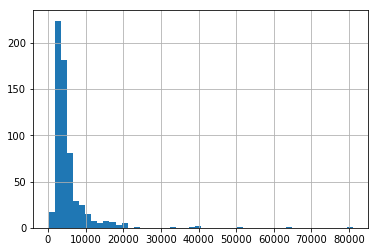

In [7]:
train["ApplicantIncome"].hist(bins=50)

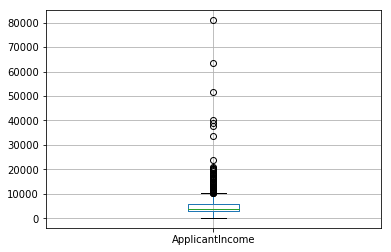

In [8]:
train.boxplot(column='ApplicantIncome')

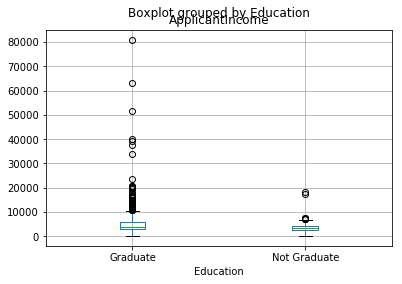

In [9]:
train.boxplot(column="ApplicantIncome", by = "Education")

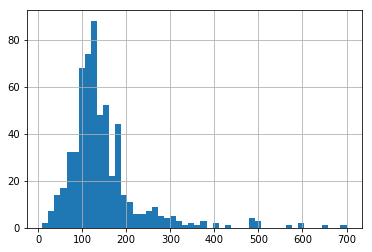

In [10]:
train['LoanAmount'].hist(bins=50)

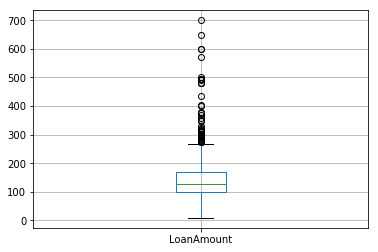

In [11]:
train.boxplot(column="LoanAmount")

In [12]:
temp1=train["Credit_History"].value_counts(ascending=True)
temp2=train.pivot_table(values="Loan_Status", index=["Credit_History"], aggfunc=lambda x: x.map({"Y":1,"N":0}).mean())
print("Frequency table for credit history")
print(temp1)

Frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [13]:
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)


Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


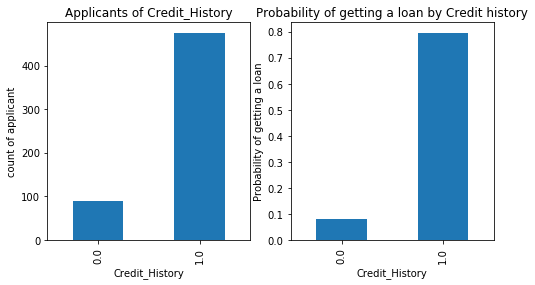

In [14]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("count of applicant")
ax1.set_title("Applicants of Credit_History")
temp1.plot(kind="bar")

ax2=fig.add_subplot(122)
temp2.plot(kind="bar")
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Probability of getting a loan")
ax2.set_title("Probability of getting a loan by Credit history")

In [15]:
temp3=train.pivot_table(values="Loan_Status", index=["Married"], aggfunc=lambda x: x.map({"Y":1,"N":0}).mean())
temp3

Married
No     0.629108
Yes    0.716080
Name: Loan_Status, dtype: float64

In [16]:
temp4=train.pivot_table(values="Loan_Status", index=["Self_Employed"], aggfunc=lambda x: x.map({"Y":1,"N":0}).mean())
temp4

Self_Employed
No     0.686000
Yes    0.682927
Name: Loan_Status, dtype: float64

In [17]:
temp5=train.pivot_table(values="Loan_Status", index=["Property_Area"], aggfunc=lambda x: x.map({"Y":1,"N":0}).mean())
temp5

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

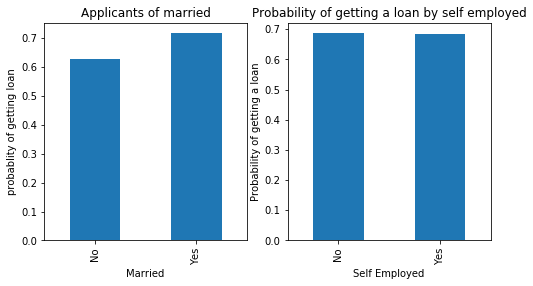

In [18]:
fig=plt.figure(figsize=(8,4))
ax3=fig.add_subplot(121)
ax3.set_xlabel("married")
ax3.set_ylabel("probablity of getting loan")
ax3.set_title("Applicants of married")
temp3.plot(kind="bar")

ax4=fig.add_subplot(122)
temp4.plot(kind="bar")
ax4.set_xlabel("Self Employed")
ax4.set_ylabel("Probability of getting a loan")
ax4.set_title("Probability of getting a loan by self employed")



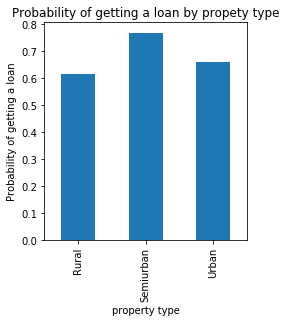

In [19]:
fig=plt.figure(figsize=(8,4))
ax5=fig.add_subplot(121)
temp5.plot(kind="bar")
ax5.set_xlabel("property type")
ax5.set_ylabel("Probability of getting a loan")
ax5.set_title("Probability of getting a loan by propety type")

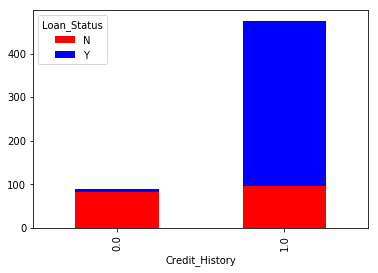

In [20]:
temp6 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [21]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

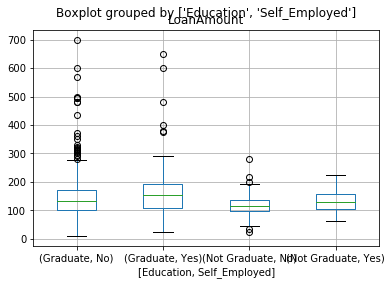

In [23]:
train.boxplot(column="LoanAmount", by = ["Education","Self_Employed"])

In [24]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
train['Self_Employed'].fillna('No',inplace=True)

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [27]:
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


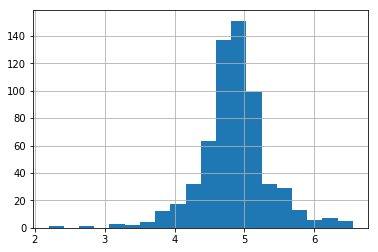

In [28]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

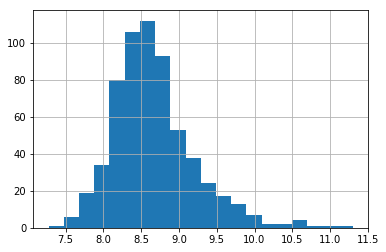

In [39]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20) 

In [30]:
Le=preprocessing.LabelEncoder()
for col in train.columns:
    if train[col].dtypes== object :
        train[col]=Le.fit_transform(train[col])
print(train.tail(17))


     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
597      597       1        0         0.0          0              0   
598      598       1        1         0.0          0              1   
599      599       1        1         2.0          0              0   
600      600       0        0         3.0          0              0   
601      601       1        1         0.0          1              0   
602      602       1        1         3.0          0              0   
603      603       1        0         0.0          0              0   
604      604       0        1         1.0          0              0   
605      605       1        1         0.0          1              0   
606      606       1        1         1.0          0              0   
607      607       1        1         2.0          1              0   
608      608       1        1         0.0          0              0   
609      609       0        0         0.0          0              0   
610   

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\Pawan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [33]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [35]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [37]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [38]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.722%


In [40]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.183%


In [41]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.267315
TotalIncome_log     0.264436
LoanAmount_log      0.230479
Property_Area       0.049901
Dependents          0.049664
Loan_Amount_Term    0.041758
Married             0.027326
Education           0.026215
Gender              0.022158
Self_Employed       0.020747
dtype: float64


In [42]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.621%
